In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uci-online-news-popularity-data-set/OnlineNewsPopularity.csv
/kaggle/input/uci-online-news-popularity-data-set/OnlineNewsPopularity.names


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install scikit-learn==1.3.2 imbalanced-learn==0.12.4 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 16.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.3.2 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


## 資料前處理

### 1. 觀察資料
### 2. 清洗資料
### 3. 了解關係

In [4]:
# 載入資料初步檢查
df = pd.read_csv("/kaggle/input/uci-online-news-popularity-data-set/OnlineNewsPopularity.csv")
print(df.shape)
df.head()

(39644, 61)


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
# 檢查內容
df.info()
# 有39644筆資料，可查看有沒有缺失值及欄位的資料型態
df.describe()
# 資料集的所有統計數據

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [6]:
# 處理欄位標題的空格
df.columns = df.columns.str.strip() 
# 移除無意義欄位(這邊刪除網址和更新時間)
df = df.drop(columns=['url', 'timedelta'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


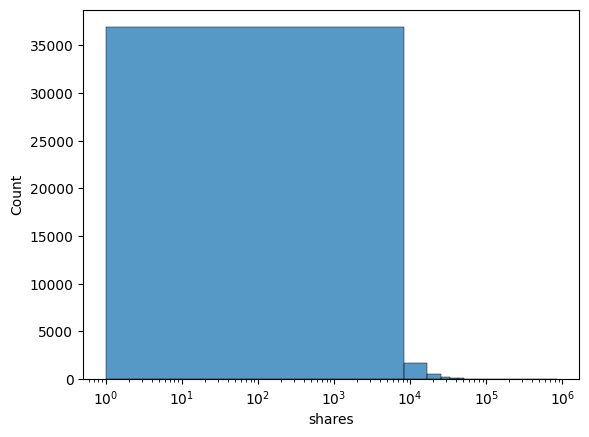

In [7]:
# 檢查欄位的分布（如偏態、極端值）
sns.histplot(df['shares'], bins=100)
plt.xscale('log') # 偏態嚴重

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


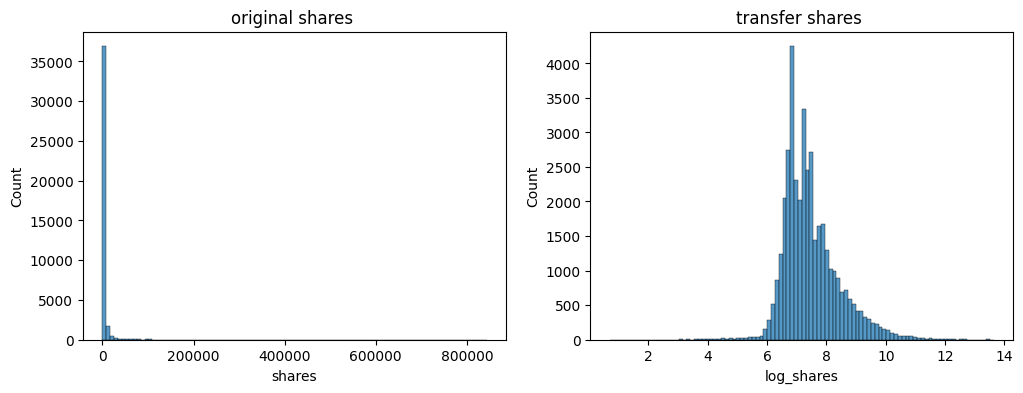

In [8]:
df['log_shares'] = np.log1p(df['shares']) # log1p->log(1+x)，避免x等於0的情況
fig, axes = plt.subplots(1, 2, figsize=(12, 4)) # 建立圖表區(1列，2欄，圖大小12寬X4高)
sns.histplot(df['shares'], bins=100, ax=axes[0])
axes[0].set_title('original shares ')
# axes[0].set_yscale('log')
sns.histplot(df['log_shares'], bins=100, ax=axes[1])
axes[1].set_title('transfer shares ')
plt.show()
# 偏態嚴重取log避免偏差過大

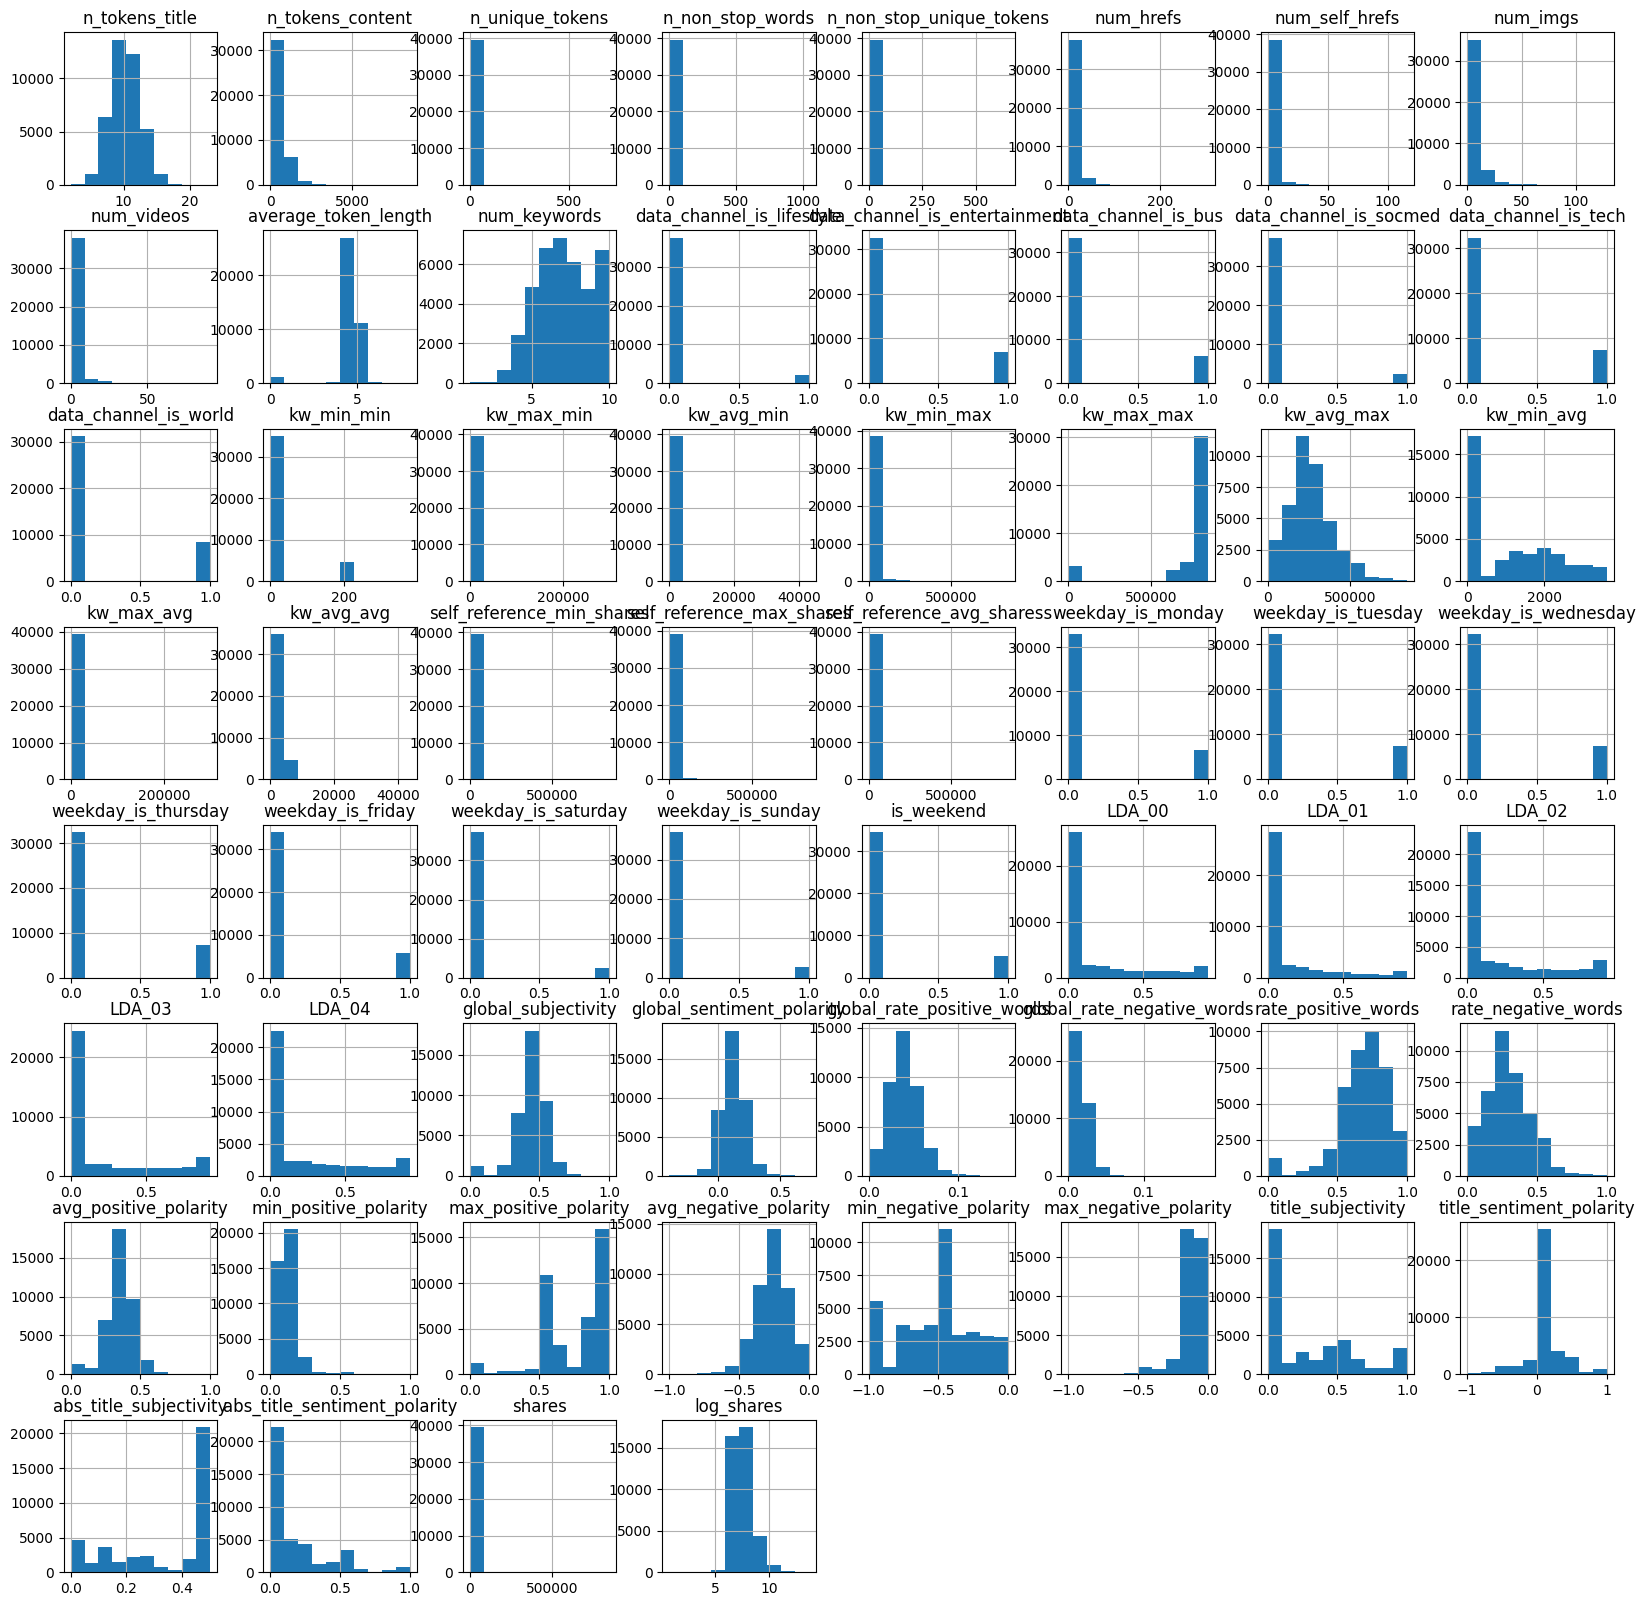

In [9]:
df.hist(figsize=(20,20))
plt.show()

log_shares                    1.000000
shares                        0.510181
kw_avg_avg                    0.221822
LDA_03                        0.126037
is_weekend                    0.114391
kw_max_avg                    0.109343
kw_min_avg                    0.108850
num_hrefs                     0.105142
num_imgs                      0.091519
self_reference_avg_sharess    0.087238
Name: log_shares, dtype: float64
data_channel_is_bus             -0.030587
weekday_is_tuesday              -0.031095
avg_negative_polarity           -0.034323
weekday_is_wednesday            -0.036609
average_token_length            -0.045321
rate_negative_words             -0.048176
LDA_01                          -0.052992
data_channel_is_entertainment   -0.082531
data_channel_is_world           -0.151685
LDA_02                          -0.165076
Name: log_shares, dtype: float64


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


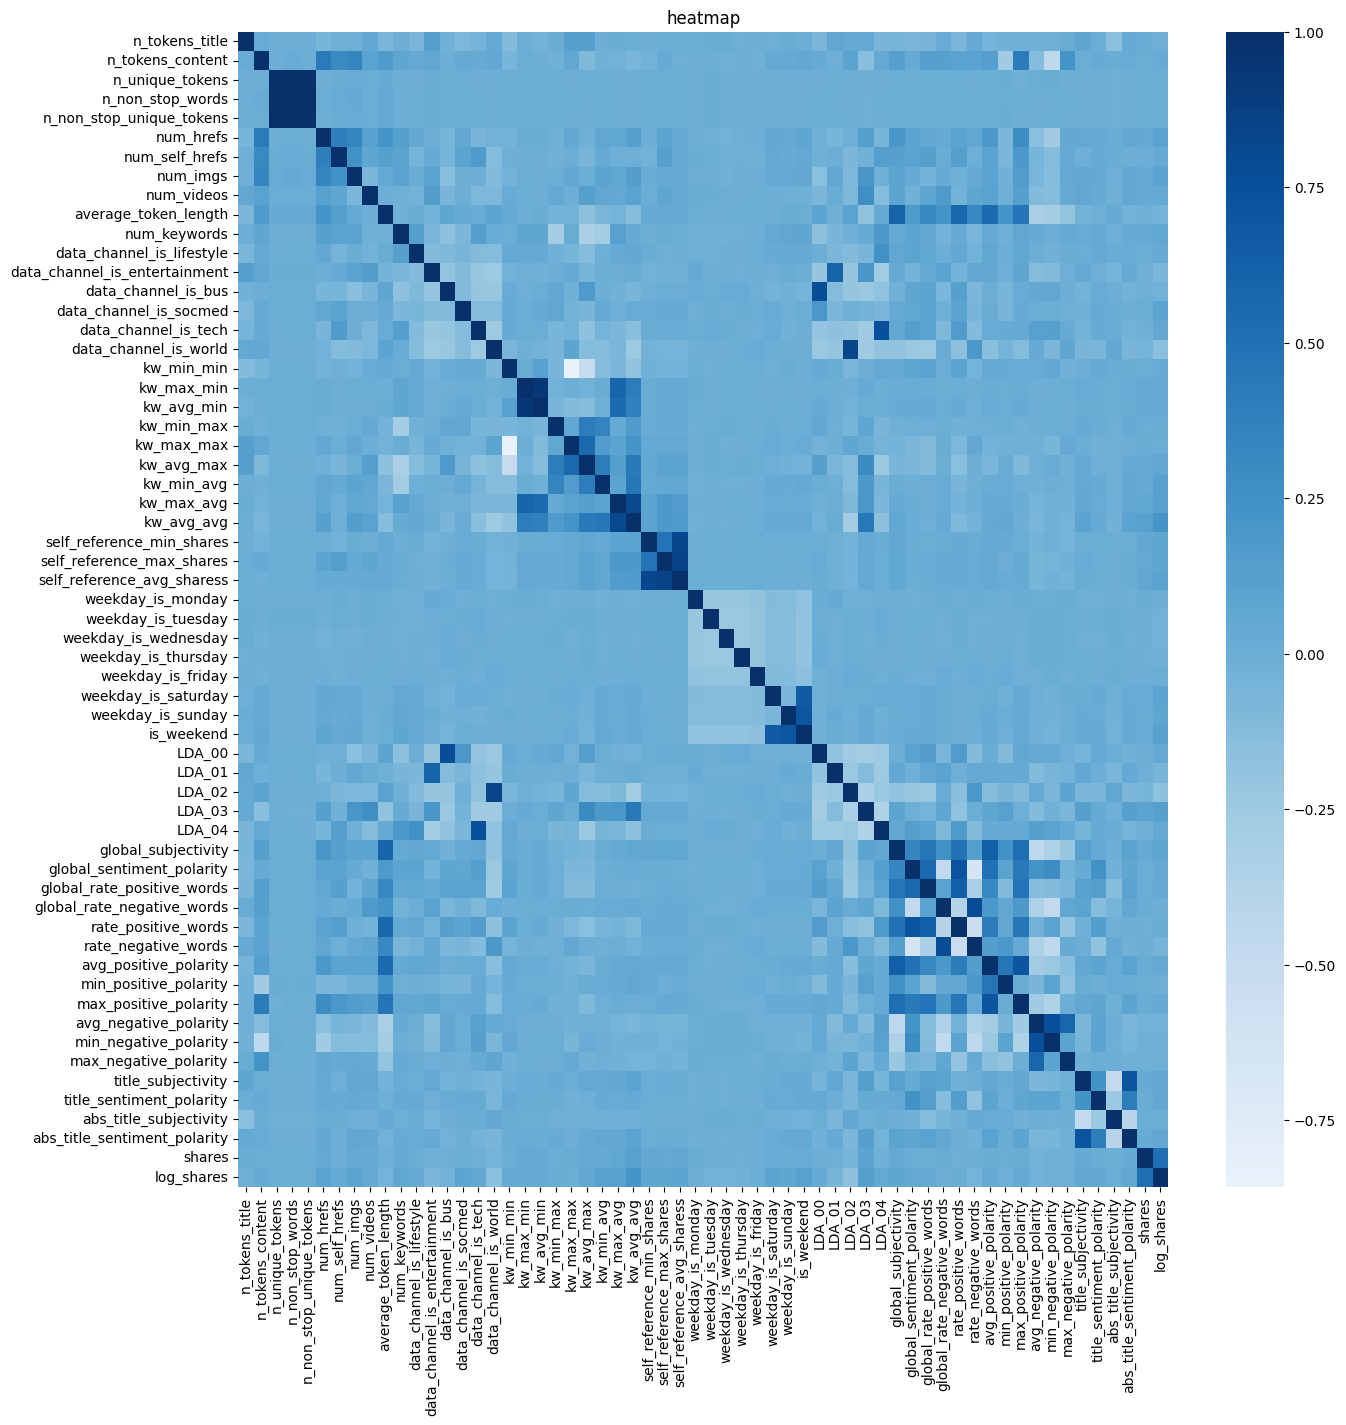

In [10]:
# 與 log_shares 的相關係數排序
correlations = df.corr(numeric_only=True)['log_shares'].sort_values(ascending=False)
print(correlations.head(10))  # 看正相關前10名
print(correlations.tail(10))  # 看負相關前10名

# 熱力圖觀察整體變數間的關係
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(numeric_only=True), cmap='Blues', center=0)
plt.title('heatmap')
plt.show()


In [11]:
# n_tokens_content代表文章內文的詞數，若為0則代表這個文章沒有內文
num_of_nowords=df[df['n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)

number of news items with no words 1181


In [12]:
# 將無內文的文章去除
df = df[df['n_tokens_content'] != 0]
# 將高度相關性的特徵去除
df= df.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

## 分類問題：哪些特徵會直接提升分享量？
1. 先將分享量分類：怎樣算高分享量？怎樣算低分享量？

In [13]:
# 將分享量切成兩等分(由小到大)
df['share_class'] = pd.qcut(df['shares'], q=[0, 0.6, 1.0], labels=['low', 'high'])

In [14]:
# 檢查兩種分布的數量
df['share_class'].value_counts(normalize=True)

share_class
low     0.618698
high    0.381302
Name: proportion, dtype: float64

In [15]:
# 去除不需要的欄位（不使用原始shares）
df = df.drop(['shares', 'log_shares'], axis=1)  # shares 已轉成 log_shares

# 避免 model 預測 log_shares 自己
target = 'share_class'
X = df.drop(columns=[target])
y = df[target]

### SelectKBest：篩選前 K 個「最相關」的特徵
* 一種「特徵選擇」（Feature Selection）方法。
* 根據特定的統計評分方法（例如：f-score、mutual information），選出與目標變數最相關的前 K 個特徵。

In [16]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X)

selector = SelectKBest(score_func=chi2, k=55)
X_new = selector.fit_transform(X_scaled, y)

# 查看被選中的特徵名稱
selected_features = selector.get_support(indices=True)
print(X.columns[selected_features])

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg

## 模型建立
### 1. 決策樹
* 監督式學習模型
* 一連串「條件判斷」構成的樹狀結構
* 每個節點根據一個特徵進行「切分」，直到葉節點給出預測值（或類別）
* 注意：決策樹容易過擬合
* 類型：回歸或分類

In [17]:
# 決策樹
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [18]:
# 轉換 y 成數值標籤
le = LabelEncoder()
y_encoded = le.fit_transform(y) 

# 切分訓練與測試資料
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 建立與訓練決策樹模型
dt_model = DecisionTreeClassifier(random_state=3)


In [19]:
# 交叉驗證：使用 StratifiedKFold，保留類別比例
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='accuracy')
print("交叉驗證準確率（每折）：", cv_scores)
print("交叉驗證平均準確率：", np.mean(cv_scores))

交叉驗證準確率（每折）： [0.59944751 0.59506012 0.58839779 0.59311017 0.59571011]
交叉驗證平均準確率： 0.5943451413714657


In [20]:
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print("\n測試集準確率：", accuracy_score(y_test, y_pred))
print("分類報告：")
print(classification_report(y_test, y_pred, target_names=le.classes_))


測試集準確率： 0.5858572728454439
分類報告：
              precision    recall  f1-score   support

        high       0.46      0.47      0.46      2929
         low       0.67      0.66      0.66      4764

    accuracy                           0.59      7693
   macro avg       0.56      0.56      0.56      7693
weighted avg       0.59      0.59      0.59      7693



In [21]:
# 取得重要性分數
importances = dt_model.feature_importances_

# 建立 DataFrame 方便排序與觀察
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# 按照重要性排序，列出前幾項
top_features = feature_importance_df.sort_values(by='importance', ascending=False).head(10)

print(top_features)

                      feature  importance
22                 kw_avg_avg    0.072424
19                 kw_avg_max    0.036792
45      avg_positive_polarity    0.035724
34                     LDA_00    0.035151
39        global_subjectivity    0.034573
21                 kw_max_avg    0.034362
23  self_reference_min_shares    0.034132
16                 kw_max_min    0.033241
1            n_tokens_content    0.033112
2             n_unique_tokens    0.033067


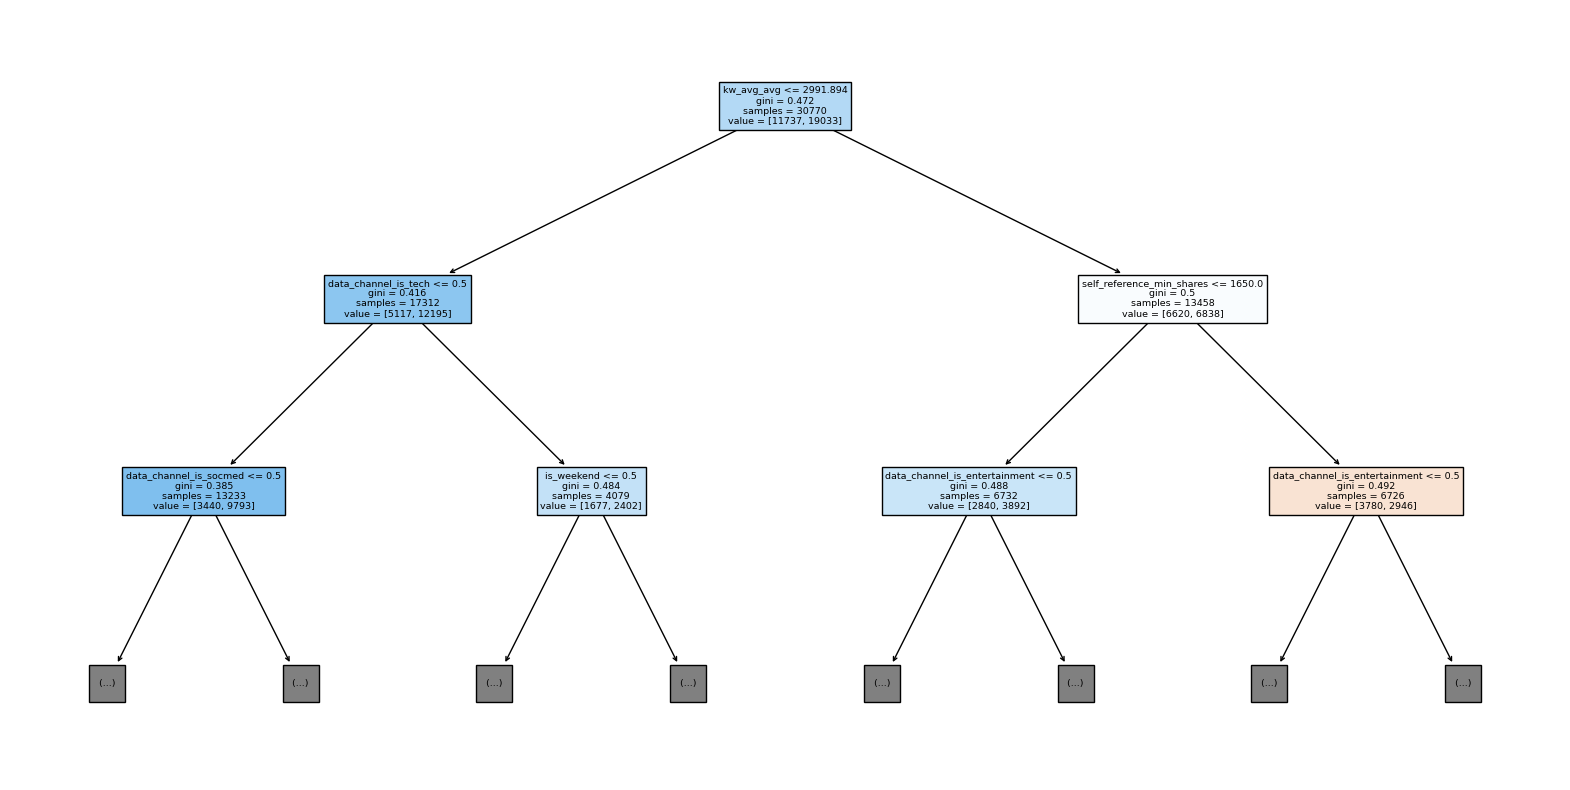

In [22]:
# 視覺了解前幾層是依據哪些特徵進行切割
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, max_depth=2)
plt.show()

### 2. 隨機數森林
* 集成學習（Ensemble Learning）方法
* Bagging（Bootstrap Aggregating）：每棵樹訓練時隨機抽樣資料（有放回的抽樣）
* 隨機特徵選擇：每個節點只從隨機選出的一小部分特徵中選擇最佳分裂點

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# y 是文字標籤，'low', 'high'，先轉成數值型態
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 資料訓練：切分資料
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
# 利用選中的特徵訓練
# X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# 建立隨機森林模型
rf = RandomForestClassifier(random_state=3)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=3)

In [24]:
# 使用 cross validation 交叉驗證
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# 評估
scores = cross_val_score(rf, X_train, y_train, cv=3, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())

Cross-validation scores: [0.67924344 0.67583114 0.67706708]
Average accuracy: 0.6773805552982576


In [25]:
# 訓練整個訓練集
rf.fit(X_train, y_train)

# 在測試集上評估模型
print("Test set 準確率：", rf.score(X_test, y_test))

Test set 準確率： 0.6784089431951125


In [26]:
rf_pred = rf.predict(X_test)

# 印出分類報告
print(classification_report(y_test, rf_pred, target_names=le.classes_))

              precision    recall  f1-score   support

        high       0.61      0.42      0.50      2929
         low       0.70      0.84      0.76      4764

    accuracy                           0.68      7693
   macro avg       0.66      0.63      0.63      7693
weighted avg       0.67      0.68      0.66      7693



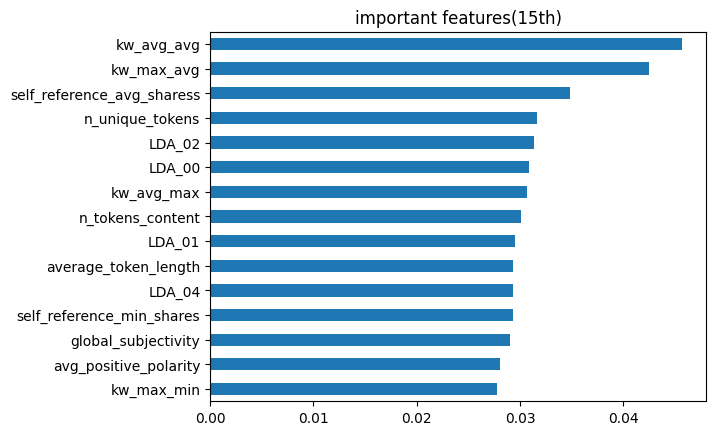

In [27]:
# 查看特徵重要性
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(15).plot(kind='barh')
plt.title('important features(15th)')
plt.gca().invert_yaxis()
plt.show()

## XGboost

In [28]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight

# 將目標轉成數值
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 根據類別分佈給權重
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
sample_weights = np.array([class_weights[label] for label in y_train])

# 使用 Stratified K-Fold，確保每折中類別比例一致
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=3)
scores = []

# 手動執行交叉驗證，使用 accuracy 做為評估指標
# sample_weight無法直接傳進交叉驗證中，需手動跑回圈
for train_idx, val_idx in cv.split(X_train, y_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]
    sw_tr = sample_weights[train_idx]

    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        learning_rate=0.05,
        max_depth=5,
        n_estimators=300,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=3
    )
    xgb_model.fit(X_tr, y_tr, sample_weight=sw_tr)
    y_pred = xgb_model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    scores.append(acc)

In [29]:
print(f'Cross-validation accuracy scores: {scores}')
print(f'Mean CV accuracy: {np.mean(scores):.4f}')

Cross-validation accuracy scores: [0.671053914399922, 0.6678365993955347, 0.6635140405616224]
Mean CV accuracy: 0.6675


In [30]:
# 用全部的訓練集重新訓練一次模型（準備測試用）
xgb_model.fit(X_train, y_train)

# 在測試集上評估泛化效果
xgb_pred = xgb_model.predict(X_test)
print(classification_report(y_test, xgb_pred, target_names=le.classes_))

              precision    recall  f1-score   support

        high       0.62      0.45      0.52      2929
         low       0.71      0.83      0.77      4764

    accuracy                           0.69      7693
   macro avg       0.67      0.64      0.65      7693
weighted avg       0.68      0.69      0.68      7693



## LightGBM

In [31]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, StratifiedKFold

# 將目標轉成數值
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 建立 LightGBM 回歸模型
lgbm = lgb.LGBMClassifier(random_state=42)

In [32]:
# 訓練模型
lgbm.fit(X_train, y_train)

# 使用 Stratified K-Fold，確保每折中類別比例一致
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=3)

# 執行交叉驗證，使用 accuracy 做為評估指標
scores = cross_val_score(lgbm, X_train, y_train, cv=cv, scoring='accuracy')

print(f'Cross-validation accuracy scores: {scores}')
print(f'Mean CV accuracy: {np.mean(scores):.4f}')

[LightGBM] [Info] Number of positive: 19033, number of negative: 11737
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7681
[LightGBM] [Info] Number of data points in the train set: 30770, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.618557 -> initscore=0.483428
[LightGBM] [Info] Start training from score 0.483428
[LightGBM] [Info] Number of positive: 9516, number of negative: 5869
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7598
[LightGBM] [Info] Number of data points in the train set: 15385, number of used features: 55
[LightGBM] [Info] [bin

In [33]:
lgbm.fit(X_train, y_train)

# 在測試集上評估泛化效果
lgbm_pred = lgbm.predict(X_test)
print(classification_report(y_test, lgbm_pred, target_names=le.classes_))

[LightGBM] [Info] Number of positive: 19033, number of negative: 11737
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7681
[LightGBM] [Info] Number of data points in the train set: 30770, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.618557 -> initscore=0.483428
[LightGBM] [Info] Start training from score 0.483428
              precision    recall  f1-score   support

        high       0.62      0.45      0.52      2929
         low       0.71      0.83      0.77      4764

    accuracy                           0.69      7693
   macro avg       0.67      0.64      0.65      7693
weighted avg       0.68      0.69      0.67      7693



1. 整體準確率 (Accuracy)
    * XGBoost 和 LightGBM 以些微差距勝出（0.69 vs 0.68），但差異不大，代表整體分類表現相近。
2. Macro F1-score（平衡三類的重要指標）
    * XGBoost 和 LightGBM 的 Macro F1-score 同為 0.65，略勝一籌，表示它們在兩類（high、low）上表現較平衡。
3. 中間類別（medium）的表現
    * XGBoost 與 LightGBM 在 high 類別有相同表現，F1-score 為 0.52；隨機森林稍差，但三者皆有待提升。
4. 低類別 (low) 和 高類別 (high)
    * 三個模型在 low 類別表現接近，但 XGBoost 與 LightGBM Precision 較高，整體稍優。
  
**繼續調整 XGBoost，LightGBM當輔助**

In [34]:
# 取得特徵重要性（使用 gain：提升準確率的貢獻）
importances = xgb_model.get_booster().get_score(importance_type='gain')

# 轉成 DataFrame 並排序
importance_df = pd.DataFrame({
    'feature': list(importances.keys()),
    'importance': list(importances.values())
}).sort_values(by='importance', ascending=False)

# 顯示前 10 名
top_10_features = importance_df.head(10)
print(top_10_features)

                          feature  importance
10  data_channel_is_entertainment   42.573032
13           data_channel_is_tech   37.035187
14          data_channel_is_world   33.853531
22                     kw_avg_avg   29.736965
12         data_channel_is_socmed   28.358055
33                     is_weekend   28.281101
25     self_reference_avg_sharess   23.574194
31            weekday_is_saturday   19.343470
18                     kw_max_max   18.547308
23      self_reference_min_shares   15.998999


In [35]:
# 目前各類的分布
print(le.classes_)
np.bincount(y_encoded)  # 如果 y_encoded = le.fit_transform(y)

['high' 'low']


array([14666, 23797])

## 調整 XGBoost 參數

In [36]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, StratifiedKFold
from collections import Counter
from imblearn.over_sampling import SMOTE

# 計算 scale_pos_weight
# 以 binary 分類為例（0: low, 1: high）
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]  # low / high

# 將目標轉成數值
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# 根據類別分佈給權重
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
sample_weights = np.array([class_weights[label] for label in y_train])

# 使用 Stratified K-Fold，確保每折中類別比例一致
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=3)
scores = []

# 手動執行交叉驗證，使用 accuracy 做為評估指標
# sample_weight無法直接傳進交叉驗證中，需手動跑回圈
for train_idx, val_idx in cv.split(X_train, y_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]
    sw_tr = sample_weights[train_idx]

    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        learning_rate=0.05,
        max_depth=4,
        n_estimators=400,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,                      # L1 正則
        reg_lambda=1.0,                     # L2 正則
        random_state=3
    )
    xgb_model.fit(X_tr, y_tr, sample_weight=sw_tr)
    y_pred = xgb_model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    scores.append(acc)

In [37]:
print(f'Cross-validation accuracy scores: {scores}')
print(f'Mean CV accuracy: {np.mean(scores):.4f}')

Cross-validation accuracy scores: [0.7403262668452991, 0.7467097486011506, 0.7456651954602774]
Mean CV accuracy: 0.7442


In [38]:
# 用全部的訓練集重新訓練一次模型（準備測試用）
xgb_model.fit(X_train, y_train)

# 在測試集上評估泛化效果
xgb_pred = xgb_model.predict(X_test)
print(classification_report(y_test, xgb_pred, target_names=le.classes_))

              precision    recall  f1-score   support

        high       0.62      0.48      0.54      2929
         low       0.72      0.82      0.76      4764

    accuracy                           0.69      7693
   macro avg       0.67      0.65      0.65      7693
weighted avg       0.68      0.69      0.68      7693

